In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Arial"
from tqdm import tqdm
from scipy.io import loadmat

In [2]:
# define time interval
t = np.array([0])

# define simulation inputs
n_conf = 21
n_particle = 16384
n_frame = t.size
rs = 6
rc = 2

# filename
filename_GT = '11__0.218_0.267_3.678/'
filename_NN = '11__0.225_0.3_3/'

filename_rg_GT = 'rg_py_GT.mat'
filename_rg_NN = 'rg_py_NN.mat'

In [23]:
def calculate_shape(rg):
    w,v = np.linalg.eig(rg)
    ind = np.argsort(w)
    lmbda = w[ind]
    Q = np.array([v[:,i] for i in ind])

    asph = lmbda[2] - (lmbda[1]+lmbda[0])/2
    acyl = (lmbda[1]-lmbda[0])
    rad_gyr = np.sum(lmbda)
    kappa = (asph**2+(3/4*acyl**2))/rad_gyr**2
    
    return lmbda, Q, asph, acyl, rad_gyr, kappa

In [38]:
# GT
rg_all_c = loadmat(filename_rg_GT)['rg_all']
params_LCU_c = []
for i in tqdm(range(n_conf)):
    rg_all_list = [rg_all_c[:,:,j,i] for j in range(n_particle)]
    params_LCU = list(map(calculate_shape,rg_all_list))
    params_LCU_c += params_LCU
    
lmbda_GT, Q_GT, asph_GT, acyl_GT, rad_gyr_GT, kappa_GT = list(zip(*params_LCU_c))
   
# NN
rg_all_c = loadmat(filename_rg_NN)['rg_all']
params_LCU_c = []
for i in tqdm(range(n_conf)):
    rg_all_list = [rg_all_c[:,:,j,i] for j in range(n_particle)]
    params_LCU = list(map(calculate_shape,rg_all_list))
    params_LCU_c += params_LCU
    
lmbda_NN, Q_NN, asph_NN, acyl_NN, rad_gyr_NN, kappa_NN = list(zip(*params_LCU_c))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:21<00:00,  1.01s/it]


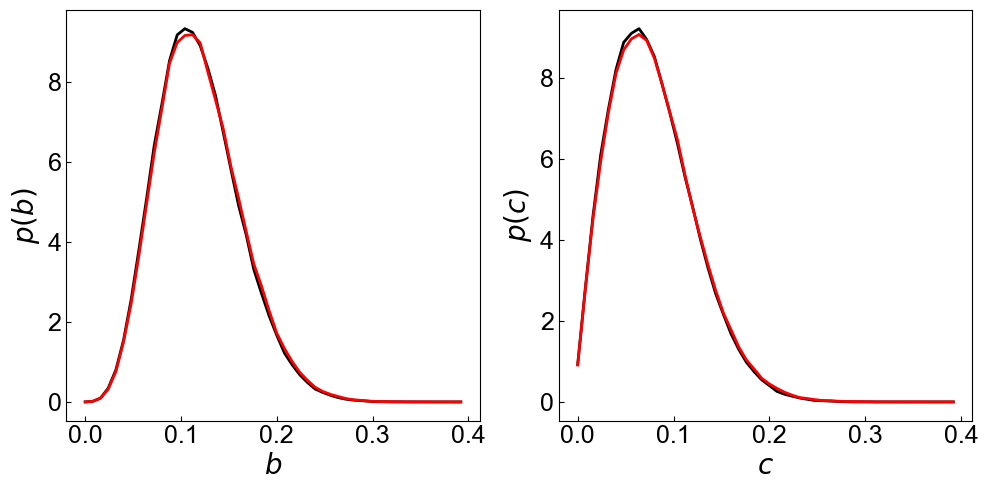

In [67]:
bins = np.linspace(0,0.40,51)

fig = plt.figure(figsize=(10, 5))
# asphericity
ax = plt.subplot(1,2,1)
hist_GT, bin_edges = np.histogram(asph_GT, bins, density=True)
hist_NN, bin_edges = np.histogram(asph_NN, bins, density=True)

ax.plot(bin_edges[:-1],hist_GT,'-k',lw=2)
ax.plot(bin_edges[:-1],hist_NN,'-r',lw=2)

ax.set_xlabel(r'$b$',fontsize=20)
ax.set_ylabel(r'$p(b)$',fontsize=20)
ax.tick_params(direction='in', axis='both', which='both', labelsize=18)

# acylindricity
ax = plt.subplot(1,2,2)
hist_GT, bin_edges = np.histogram(acyl_GT, bins, density=True)
hist_NN, bin_edges = np.histogram(acyl_NN, bins, density=True)

ax.plot(bin_edges[:-1],hist_GT,'-k',lw=2)
ax.plot(bin_edges[:-1],hist_NN,'-r',lw=2)

ax.set_xlabel(r'$c$',fontsize=20)
ax.set_ylabel(r'$p(c)$',fontsize=20)
ax.tick_params(direction='in', axis='both', which='both', labelsize=18)

# # kappa
# ax = plt.subplot(1,3,3)
# bins_kappa = np.linspace(0,0.0008,51)
# hist_GT, bin_edges = np.histogram(kappa_GT, bins_kappa, density=True)
# hist_NN, bin_edges = np.histogram(kappa_NN, bins_kappa, density=True)

# ax.plot(bin_edges[:-1],hist_GT,'-k',lw=2)
# ax.plot(bin_edges[:-1],hist_NN,'-r',lw=2)

# ax.set_xlabel(r'$\kappa$',fontsize=20)
# ax.set_ylabel(r'$p(\kappa)$',fontsize=20)
# ax.tick_params(direction='in', axis='both', which='both', labelsize=18)

plt.tight_layout()
plt.show()

In [55]:
max(kappa_GT)

0.0011987049067539455